In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.shape

(150, 5)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal_length']], df['species'], random_state=0)


In [12]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
clf = LogisticRegression()


In [15]:
clf.fit(X_train, y_train)

LogisticRegression()

In [16]:
X_test[0].reshape(1,-1)

array([[0.72717965]])

In [17]:
print('prediction', clf.predict(X_test[0].reshape(1,-1))[0])
print('probability', clf.predict_proba(X_test[0].reshape(1,-1)))

prediction virginica
probability [[0.00433498 0.34054958 0.65511545]]


In [18]:
import pandas as pd

example_df = pd.DataFrame()
example_df.loc[:, 'petal_length'] = X_test.flatten()  # Use flatten() if X_test is a NumPy array
example_df.loc[:, 'target'] = y_test.values  # Ensure y_test is a Series or NumPy array

# Get the probability of the positive class (assuming binary classification)
example_df['logistic_preds'] = clf.predict_proba(X_test)[:, 1]  # Use [:, 1] for the second column

print(example_df.head())


   petal_length      target  logistic_preds
0      0.727180   virginica        0.340550
1      0.113560  versicolor        0.768752
2     -1.336815      setosa        0.065516
3      1.396583   virginica        0.041730
4     -1.281032      setosa        0.078135


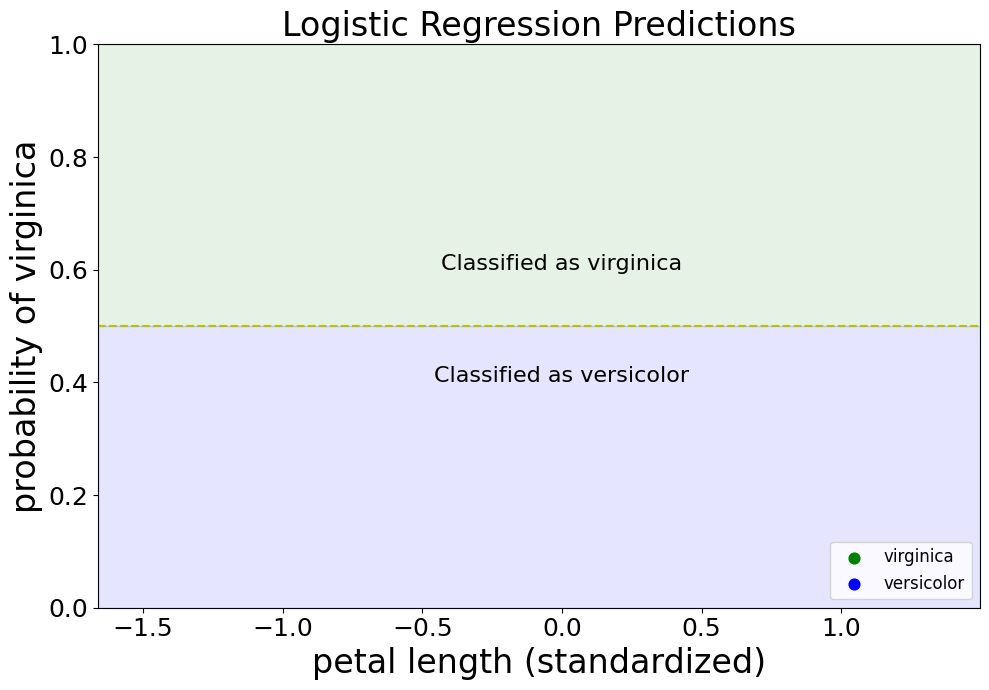

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

# Define class filters
virginicaFilter = example_df['target'] == 1  # Virginica
versicolorFilter = example_df['target'] == 0  # Versicolor

# Scatter plot for Virginica
ax.scatter(
    example_df.loc[virginicaFilter, 'petal_length'],
    example_df.loc[virginicaFilter, 'logistic_preds'],
    color='g', s=60, label='virginica'
)

# Scatter plot for Versicolor
ax.scatter(
    example_df.loc[versicolorFilter, 'petal_length'],
    example_df.loc[versicolorFilter, 'logistic_preds'],
    color='b', s=60, label='versicolor'
)

# Decision boundary
ax.axhline(y=0.5, color='y', linestyle='--')

# Shaded classification regions
ax.axhspan(0.5, 1, alpha=0.1, color='green')
ax.axhspan(0, 0.4999, alpha=0.1, color='blue')

# Classification labels
ax.text(0, 0.6, 'Classified as virginica', fontsize=16, ha='center')
ax.text(0, 0.4, 'Classified as versicolor', fontsize=16, ha='center')

# Axis settings
ax.set_ylim(0, 1)
ax.set_xlim(example_df['petal_length'].min() - 0.1, example_df['petal_length'].max() + 0.1)

# Labels and title
ax.set_xlabel('petal length (standardized)', fontsize=24)
ax.set_ylabel('probability of virginica', fontsize=24)
ax.set_title('Logistic Regression Predictions', fontsize=24)

# Legend and layout adjustments
ax.legend(loc='lower right', markerscale=1.0, fontsize=12)
ax.tick_params(labelsize=18)

# Adjust layout
fig.tight_layout()

# Show plot
plt.show()

In [28]:
score = clf.score(X_test, y_test)
print(score)


0.9473684210526315


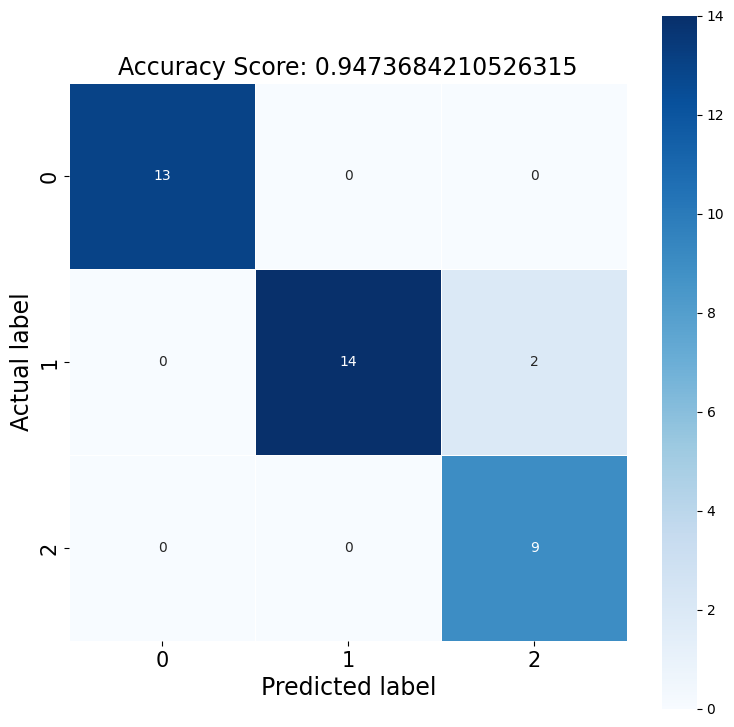

In [29]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
fmt=".0f",
linewidths=.5,
square = True,
cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [31]:
modified_cm = []
for index, value in enumerate(cm):  # Ensure cm is a valid confusion matrix (2x2)
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])

print(modified_cm)  # Verify output


[['TN = 13', 'FP = 0'], ['FN = 0', 'TP = 14']]


Shape of cm: (3, 3)
Shape of modified_cm: (3, 3)


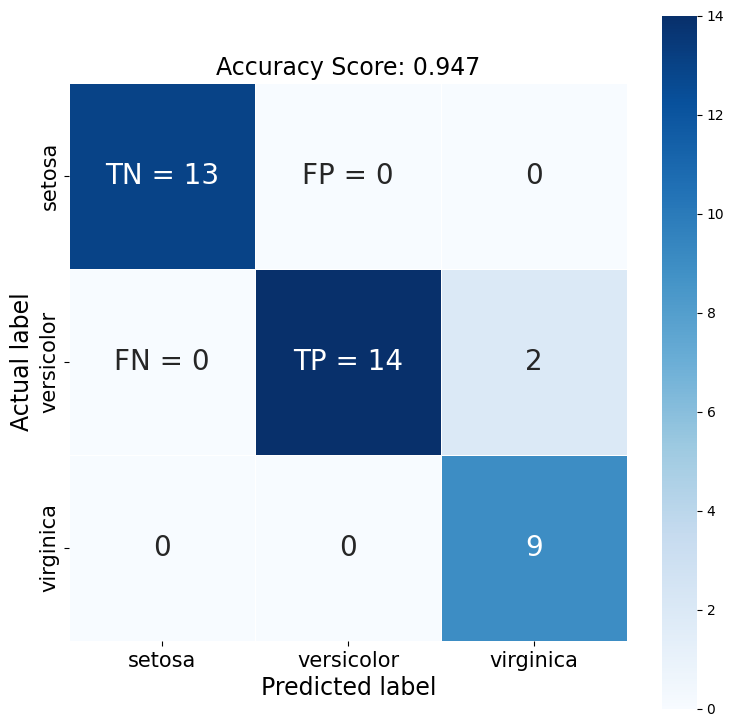

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Print shapes for debugging
print("Shape of cm:", np.shape(cm))

# Dynamically generate modified_cm to match cm's shape
modified_cm = []
for i in range(cm.shape[0]):  # Iterate over rows
    row = []
    for j in range(cm.shape[1]):  # Iterate over columns
        label = ""
        if i == 0 and j == 0:
            label = f"TN = {cm[i, j]}"  # True Negative
        elif i == 0 and j == 1:
            label = f"FP = {cm[i, j]}"  # False Positive
        elif i == 1 and j == 0:
            label = f"FN = {cm[i, j]}"  # False Negative
        elif i == 1 and j == 1:
            label = f"TP = {cm[i, j]}"  # True Positive
        else:
            label = f"{cm[i, j]}"  # For extra classes, just show the number
        row.append(label)
    modified_cm.append(row)

# Print modified_cm shape
print("Shape of modified_cm:", np.shape(modified_cm))

# Create heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(cm, 
            annot=modified_cm,  # Ensure correct shape
            fmt="",  # Keep it empty to show string annotations
            annot_kws={"size": 20},
            linewidths=0.5,
            square=True,
            cmap='Blues',
            xticklabels=['setosa', 'versicolor', 'virginica'],  # Updated for 3 classes
            yticklabels=['setosa', 'versicolor', 'virginica'])

plt.ylabel('Actual label', fontsize=17)
plt.xlabel('Predicted label', fontsize=17)
plt.title(f'Accuracy Score: {score:.3f}', size=17)
plt.tick_params(labelsize=15)

# Show the plot
plt.show()


In [37]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

In [39]:
cm

array([[13,  0,  0],
       [ 0, 14,  2],
       [ 0,  0,  9]])